In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, confusion_matrix
import pickle

import warnings
warnings.filterwarnings('ignore')

Read Dataset

In [3]:
df = pd.read_csv('startup_data.csv')
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


Univariate Analysis

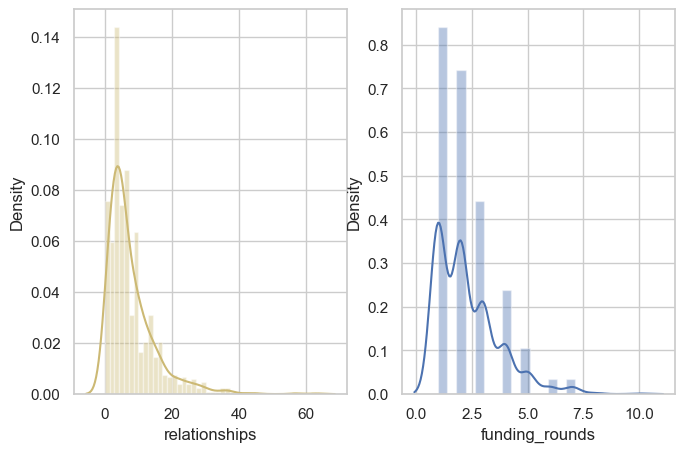

In [4]:
plt.figure(figsize=(12,5))
plt.subplot(131)
sns.distplot(df["relationships"],color="y")
plt.subplot(132)
sns.distplot(df["funding_rounds"])
plt.show()

Bivariate Analysis

<Axes: xlabel='funding_rounds', ylabel='count'>

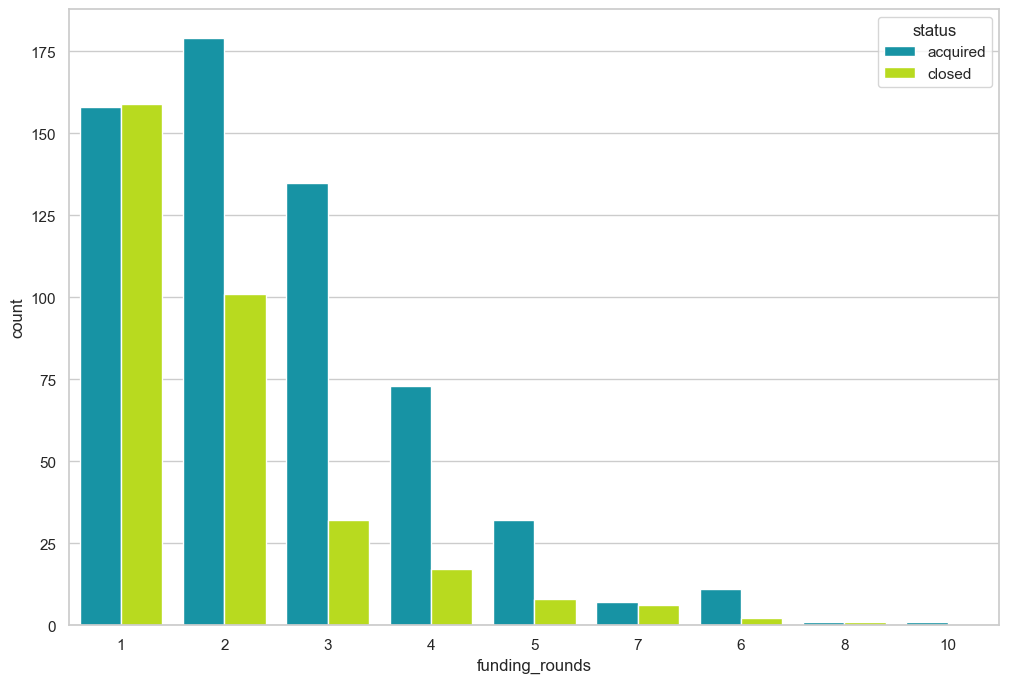

In [5]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(x="funding_rounds", hue="status", data=df, palette="nipy_spectral", order=df.funding_rounds.value_counts().index) 

<Axes: xlabel='labels', ylabel='count'>

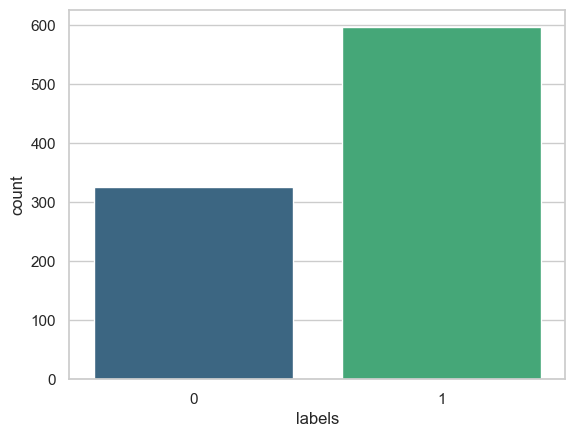

In [6]:
sns.countplot(x = df['labels'], palette= 'viridis')

Descriptive Analysis

In [7]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [8]:
df.shape

(923, 49)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

Checking for null values

In [10]:
df.isna().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

Dropping unwanted columns

In [11]:
df = df[['labels','relationships','funding_rounds','milestones','is_otherstate','is_ecommerce',\
         'has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','is_top500']]

In [12]:
df.shape

(923, 13)

Multivariate Analysis

<Axes: >

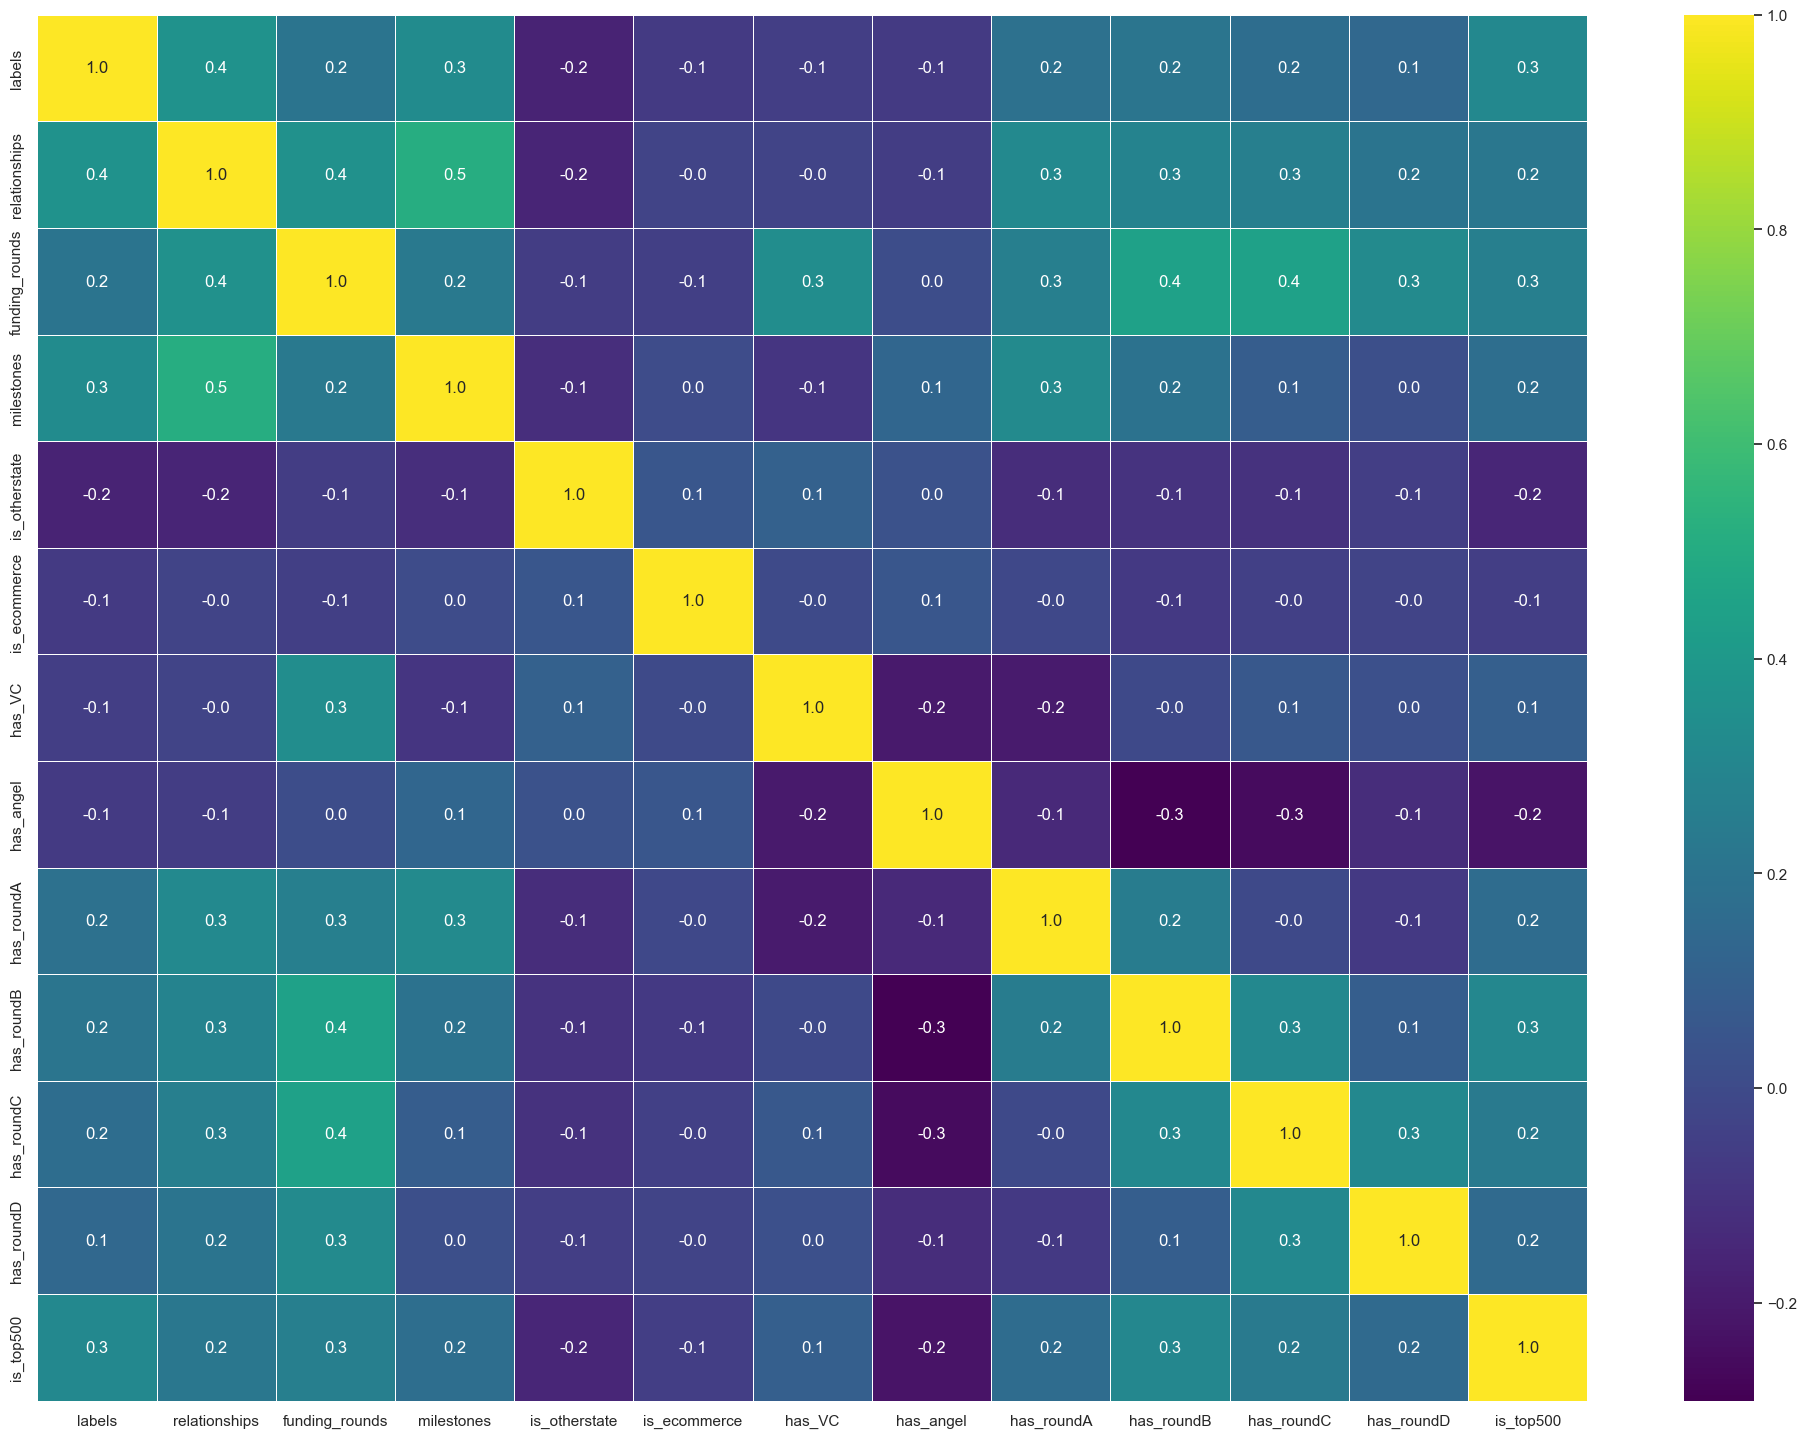

In [13]:
plt.figure(figsize = (25,18))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis', linewidth = 0.5, fmt = '.1f')

In [14]:
df.dtypes

labels            int64
relationships     int64
funding_rounds    int64
milestones        int64
is_otherstate     int64
is_ecommerce      int64
has_VC            int64
has_angel         int64
has_roundA        int64
has_roundB        int64
has_roundC        int64
has_roundD        int64
is_top500         int64
dtype: object

Scaling the data

In [15]:
X = df.drop(['labels'], axis = 1)
y = df['labels']

In [16]:
sc = StandardScaler()
x = sc.fit_transform(X)

In [17]:
x

array([[-0.648696  ,  0.49566485,  0.87613768, ..., -0.55106471,
        -0.3327311 , -2.06017431],
       [ 0.17754099,  1.21500235, -0.6368185 , ...,  1.81466891,
         3.00542987,  0.48539582],
       [-0.37328367, -0.94301016,  0.11965959, ..., -0.55106471,
        -0.3327311 ,  0.48539582],
       ...,
       [-0.37328367, -0.94301016, -0.6368185 , ..., -0.55106471,
         3.00542987,  0.48539582],
       [ 0.59065949, -0.22367266,  0.11965959, ..., -0.55106471,
        -0.3327311 ,  0.48539582],
       [-0.51098983, -0.94301016, -0.6368185 , ..., -0.55106471,
        -0.3327311 ,  0.48539582]])

In [18]:
x = pd.DataFrame(X)

Handling Class imbalance

In [19]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_bal, y_bal = smote.fit_resample(x, y)

Splitting data into train and test sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.3, random_state = 42)

Model 1: Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, confusion_matrix, f1_score
lg = LogisticRegression()

log = lg.fit(x_bal, y_bal)

y_pred = lg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[140  30]
 [ 54 135]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       170
           1       0.82      0.71      0.76       189

    accuracy                           0.77       359
   macro avg       0.77      0.77      0.77       359
weighted avg       0.77      0.77      0.77       359



In [22]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, y_pred)
logloss

8.433612492161117

Model 2: SVM

In [23]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', C = 2.0, random_state = 42)
svm.fit(x_bal, y_bal)

y_pred = svm.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[127  43]
 [ 32 157]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       170
           1       0.79      0.83      0.81       189

    accuracy                           0.79       359
   macro avg       0.79      0.79      0.79       359
weighted avg       0.79      0.79      0.79       359



Model 3: Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_bal, y_bal)
rftrain = rf.predict(X_train)
rftest = rf.predict(X_test)

print(confusion_matrix(rftrain, y_train))
print(confusion_matrix(rftest, y_test))
print(classification_report(rftrain, y_train))
print(classification_report(rftest, y_test))
      

[[413  24]
 [ 14 384]]
[[166   9]
 [  4 180]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       437
           1       0.94      0.96      0.95       398

    accuracy                           0.95       835
   macro avg       0.95      0.95      0.95       835
weighted avg       0.95      0.95      0.95       835

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       175
           1       0.95      0.98      0.97       184

    accuracy                           0.96       359
   macro avg       0.96      0.96      0.96       359
weighted avg       0.96      0.96      0.96       359



In [25]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, rftest)
logloss

1.305201933310649

Testing with Random Forest

In [26]:
rf.predict([[0,1,0,3,3,3,1,2,0,1,2,1]])

array([0], dtype=int64)

In [27]:
pickle.dump(rf, open("Randf.pkl","wb"))

In [28]:
X

,relationships,funding_rounds,milestones,is_otherstate,is_ecommerce,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,is_top500
0,3,3,3,0,0,0,1,0,0,0,0,0
1,9,4,1,0,0,1,0,0,1,1,1,1
2,5,1,2,0,0,0,0,1,0,0,0,1
3,5,3,1,0,0,0,0,0,1,1,1,1
4,2,2,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
918,9,1,2,0,0,0,0,1,0,0,0,1
919,1,3,1,0,0,1,0,0,1,0,0,1
920,5,1,1,0,0,0,0,0,0,0,1,1
921,12,2,2,0,0,0,0,1,1,0,0,1
